# Kvantropologerne - Script 2

**1 Import af pakker til python**

In [2]:
import pandas as pd # Til at strukturere datassæt i datarammer
import numpy as np # Til at foretage forskellige typer udregninger
import matplotlib.pyplot as plt # Til at lave visualiseringer af udregninger
import re # Til at lave regular expressions, som erstatter tegn/tal og forsimpler 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Til at lave wordclouds
from PIL import Image # Til at illustrere wordclouds
from os import path # ...
from spacy.lang.da.stop_words import STOP_WORDS # Til at lave lister med stopord i wordclouds 
from collections import Counter # Bruges til at tælle hvilke værdier, der hyppigst forekommer i en kolonne 

**2 Import af csv-fil**

In [3]:
# Vi importerer csv-filen med twitter-data fra Twitter-brugerne uffeelbæk og alternativet_. 
# Filen importeres i en dataframe, således at data struktureres i rækker og kolonner med variable. 

data_samlet = pd.read_csv('Elbaek_Uffe_2.0.csv', index_col=0)

# Vi bruger index_col=0 til at gøre første kolonnne til index. Dato er nu index.

**3 Vi fjerner replies**

In [4]:
# Vi fjerner alle de tweets, som er replies henvendt til andre brugere på Twitter. 
# Vi arbejder kun med tweets uden en specifik modtager. 

data_samlet = data_samlet.loc[~pd.notna(data_samlet.to)]

# "data_samlet.loc[~pd.notna(data_samlet.to)]" Vi udvælger kolonnen "to" i det samlede datasæt og fjerner tweets,
# som ikke er noteret som NaN (missing value). 
# NaN indikerer at der ikke er en modtager, og det dermed disse tweets, vi er interesserede i. 
# "data_samlet =" betyder, at vi definerer vores datasæt på ny uden replies

**4 Vi laver en wordcloud over teksten i tweets fra det samlede datasæt**

In [5]:
# Vi samler alt tekst i en string, som vi kalder "alltext",
# ved at lave et for-loop der gennemgår hvert tweet og udvælger teksten

alltext = ""
for tweet in data_samlet.text:
    try: 
        tweet = tweet.split("https")[0]
    except AttributeError: 
        continue
    alltext = alltext + " " + tweet
    
# Vi splitter først hvert tweet, så vi kun har teksten før et link "https". 
# I tweets hvor der ikke er tekst, opstår der fejl. 
# Disse springes over ved at bruge "except AttributeError:" og så "continue"

**4.1 Vi laver en wordcloud over teksten i tweets fra det samlede datasæt**

In [6]:
# Vi opdeler alle ord i vores lange string med tekst fra alle tweets. 

allwords = re.split(r'\W+', alltext)

# "re.split(r'\W+', alltext)" betyder, at vi fjerner tegn "r'" og opdeler mellem mellemrum "W+'". 

**4.2 Vi laver en wordcloud over teksten i tweets fra det samlede datasæt**

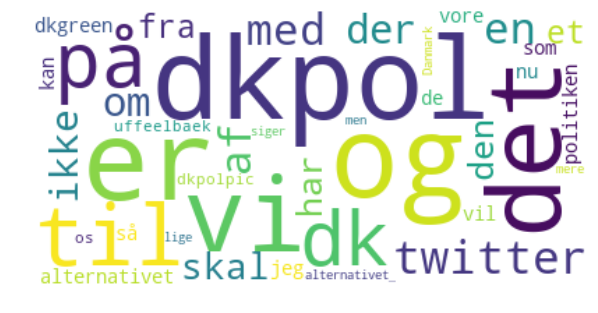

In [7]:
# Når vi har en liste med alle ord, kan vi lave en ordsky, som fremhæver de ord, der anvendes hyppigst. 

wordcloud = WordCloud(background_color="white", max_words=40, collocations=False).generate(' '.join(allwords))

# Vi definerer vores wordcloud som "wordcloud" og bruger funktionen wordcloud på vores liste med ord "allwords"
# Vi tilføjer en baggrundsfarve "white" og et maximalt antal ord "40"

plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# De ovenstående kommandoer, der starter med "plt" bruges til at vælge hvilken måde, 
# vi ønsker at illustrere vores wordcloud. 
# Vi vælger størrelse, og type "wordcloud". 
# Med kommandoen plt.show, viser vi vores wordcloud. 


**4.3 Vi laver en wordcloud over teksten i tweets fra det samlede datasæt**

In [8]:
# Vi fjerner småord/stopwords fra vores wordcloud

stopwords = set(list(STOP_WORDS) + list(STOPWORDS)+list(alltags))

# Vi definerer stopwords udfra den fastsatte liste der er i delpakken STOP_WORDS

stopwords.update(['hele','nej','mod','ja','nye','to','dk', 'pic', 'selvfølgelig', 'morgen', 'får', 'godt','com', 'www', 'helt', 'klar', 'se', 'bare', 'gerne', 'når', 'brug', 'står', 'går', 'år', 'læs', 'ser', 'gang', 'dag', 'siger'])

# Vi opdaterer listen med ord, som vi selv vælger.  

wordcloud_2 = WordCloud(stopwords=stopwords, background_color="white", max_words=40, collocations=False).generate(' '.join(allwords))

# Vi tilføjer listen stopwords i vores wordcloud ved at skrive "stopwords=stopwords". 
# Denne wordcloud er også lavet ud fra alle ord inkl. hashtags "allwords"

plt.figure(figsize=[10,10])
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'alltags' is not defined

**5. Vi laver en wordcloud over hashtags i det samlede datasæt**

In [ ]:
# Vi laver en liste med hashtags

hashtags_cleaned = data_samlet['hashtags'].dropna().astype(str).tolist()

# Vi definerer den nye liste "hashtags_cleaned" ud fra kolonnen hashtags i det samlede datasæt. 
# Vi gør det til en liste med strings ved at bruge "astype(str)"
# Vi bruger metoden "tolist()" til at tilføje hashtags til listen
# Vi fjerner missing-værdier NaN fra hashtagkolonnen ved at bruge metoden "dropna()"

**5.1 Vi laver en wordcloud over hashtags i det samlede datasæt**

In [ ]:
# Opdeling af de enkelte hashtags 

alltags = ""
for hashtags in hashtags_cleaned:
        hashtags = hashtags.split("https")[0]
        hashtags = hashtags.split("http")[0]
        alltags = alltags + " " + hashtags
        
# I listen hashtags_cleaned består listen af strings med hashtags fra hvert tweet, 
# men da der ofte anvendes mere end ét hashtag i et tweet, 
# vil vi gerne dele de strings der er i hashtags_cleaned, sådan at vi får en string med alle hahstags. 
# Gennem kommandoen "alltags = """ definerer vi "alltags" som en string. 
# Gennem for-loopet nedenfor udvælger vi hvert enkelt hashtag og tilføjer til vores string.

print(type(alltags))

# Gennem kommandoen "type()" kan vi undersøge, hvilket python objekt alltags er. 
# Outputtet viser class'str', det er en string 

print (alltags.count('#dkpol'))

# Gennem denne kommando kan vi tælle alle de gange et hashtag er blevet brugt i det samlede datasæt

**5.2 Vi laver en wordcloud over hashtags i det samlede datasæt**

In [ ]:
# Wordcloud over hashtags

wordcloud_hashtags = WordCloud(background_color="white", max_words=40, collocations=False).generate(alltags)

# Vi gør på samme måde som første wordcloud i 2.2 
# og indsætter vores string  med hashtags således "generate(alltags)""

plt.figure(figsize=[10,10])
plt.imshow(wordcloud_hashtags, interpolation='bilinear')
plt.axis("off")
plt.show()

**6 Vi laver wordclouds for Alternativet og Uffe Elbæk**

In [ ]:
# Vi laver to subdatasæt ud fra username og delt i alternativet og elbæk

alternativet = data_samlet.loc[data_samlet['username'] == 'alternativet_']
elbæk = data_samlet.loc[data_samlet['username'] == 'uffeelbaek']

# Vi definerer de to datasæt som "elbæk" og "alternativet" 
# Vi bruger "loc" til at udvælge kolonnen "username" 
# og vælger for hvert af de to datsæt hvilket username, der skal vælges.

**6.1 Vi laver en liste med hashtags for Uffe Elbæk**

In [ ]:
elbæk_hashtags = []

# Vi definerer en tom liste "elbæk_hashtags"

for hashtag in elbæk.hashtags:
    if type(hashtag) is str:
        hashtag = hashtag.split("http")[0]
        hashtag=hashtag.split()
        elbæk_hashtags.extend(hashtag)
        
# Vi kører et for loop, hvor vi adskiller http fra hashtagget, ved at bruge funktionen "split". 
# På den måde adskilles eksempelvis "dkpol" fra "http". 
# vi vælger så den første af de to dele ved at bruge "[0]". 
# Ved at bruge funktionen "extend()" efter vores tomme liste "elbæk_hashtag tilføjer vi hashtags til listen. 

**6.2 Vi laver en liste med hashtags for Alternativet**

In [ ]:
alternativet_hashtags = []

# Vi gør det samme som ovenfor i 6.1

for hashtag in alternativet.hashtags:
    if type(hashtag) is str:
        hashtag = hashtag.split("http")[0]
        hashtag=hashtag.split()
        alternativet_hashtags.extend(hashtag)

**6.3 Vi undersøger, hvilke hashtags Uffe Elbæk bruger mest**

In [ ]:
counter_elbæk_hashtags=Counter(elbæk_hashtags)

# Vi bruger funktionen counter til at optælle, hvilke værdier på en liste, der forekommer hyppigst. 
# Vi definerer det element, vi vil tælle, her er det listen "elbæk_hashtags", og sættter det ind i funktionen. 
# Vi definerer det som counter_elbæk_hashtags

counter_elbæk_hashtags.most_common(10)

# Ved at bruge metoden "most_common()" og skrive 10 i parantesen får vi de 10 værdier i "elbæk_hashtags", 
# som forekommer hyppigst.

# Vi brugte denne metode til at finde de 100 mest brugte hashtags hos både Uffe Elbæk og Alternativet 
# for at udvælge klima-hashtags. 
# Disse klimahashtags brugte vi til at lave en ny kolonne med tweets med klima-hashtags og andre hashtags. 
# Se Script 1 del 1.7

**6.4 Vi undersøger, hvilke hashtags Alternativet bruger mest** 

In [ ]:
counter_alternativet_hashtags=Counter(alternativet_hashtags)

# Vi gør det samme som ovenfor i 6.3, nu med listen "alternativet_hashtags"

counter_alternativet_hashtags.most_common(10)

**6.5 Vi fjerner missing værdier i hashtagkolonnen for både Uffe Elbæk og Alternativet**

In [ ]:
hashtags_cleaned_alternativet = alternativet['hashtags'].dropna().astype(str).tolist()

# Vi fjerner NaN fra hashtagkolonnen ved metoden "dropna()". 
# Vi definerer en liste "hashtags_cleaned_alternativet" 
# og bruger "astype(str).tolist()" til at tilføje string-elementer 
# fra kolonnen "hashtags" i subdatasættet "alternativet"

hashtags_cleaned_elbæk = elbæk['hashtags'].dropna().astype(str).tolist()

# Vi gør det samme for subdatasættet "elbæk" og definerer listen hashtags_cleaned

**6.6 Vi laver en samlet string med alle ord fra listen med hashtags for Uffe Elbæk og laver en wordcloud**

In [ ]:
alltags_elbæk = ""

#Vi laver en først en tom string.

for hashtags in hashtags_cleaned_elbæk:
        hashtags = hashtags.split("http")[0]
        alltags_elbæk = alltags_elbæk + " " + hashtags
        
# Vi laver så et for loop, hvor vi sorterer alle "http" fra hashtags. 
# Ved at bruge funktionen "alltags_elbæk = alltags_elbæk + " " + hashtags"
# tilføjer vi hashtags til den string, vi kaldte "alltags_elbæk"
        

wordcloud_hashtags_elbæk = WordCloud(background_color="white", max_words=30, max_font_size=200, collocations=False).generate(alltags_elbæk)

# Vi laver en wordcloud med den string, vi netop har defineret ved at indsætte "alltags_elbæk" i wordcloud-koden. (Se evt. )

plt.figure(figsize=[10,10])
plt.imshow(wordcloud_hashtags_elbæk, interpolation='bilinear')
plt.axis("off")
plt.show()


**6.7 Vi laver en samlet string med alle ord fra listen med hashtags for Alternativet og laver en wordcloud**

In [ ]:
# Vi gør det samme som ovenfor med hashtags fra Alternativets tweets.

alltags_alternativet = ""
for hashtags in hashtags_cleaned_alternativet:
        hashtags = hashtags.split("http")[0]
        alltags_alternativet = alltags_alternativet + " " + hashtags

wordcloud_hashtags_alternativet = WordCloud( background_color="white", max_words=30, max_font_size=100, collocations=False).generate(alltags_alternativet)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud_hashtags_alternativet, interpolation='bilinear')
plt.axis("off")
plt.show()

**7 Vi laver wordclouds med tekst fra Uffe Elbæks og Alternativets tweets. Først laver vi string med alt tekst i Elbæks Tweets**

In [ ]:
# Gentagelse af trin fra del 4-4.3 med tekst fra subdatsættet for Uffe Elbæk

alltext_elbæk = ""
for tweet in elbæk.text:
    try: 
        tweet = tweet.split("https")[0]
        tweet = tweet.split("http")[0]
    except AttributeError: 
        continue
    alltext_elbæk = alltext_elbæk + " " + tweet
    
allwords_elbæk = re.split(r'\W+', alltext_elbæk)

**7.1 Vi laver en string med alt tekst i Alternativets Tweets**

In [ ]:
# Gentagelse af trin fra del 4-4.3 med tekst fra subdatsættet for Alternativet 

alltext_alternativet = ""
for tweet in alternativet.text:
    try: 
        tweet = tweet.split("https")[0]
        tweet = tweet.split("http")[0]
    except AttributeError: 
        continue
    alltext_alternativet = alltext_alternativet + " " + tweet
    
allwords_alternativet = re.split(r'\W+', alltext_alternativet)

**7.2 Vi laver en wordcloud over tekst i Uffe Elbæks tweets**

In [ ]:
# Vi laver en Wordcloud over Uffe Elbæks mest brugte ord uden hashtags gentagelse af trin 4.3

stopwords = set(list(STOP_WORDS) + list(STOPWORDS)+ list(alltags_elbæk))
stopwords.update(['ja', 'nej', 'sidste', 'sagt', 'altså','dkgreenpic', 'to','dk', 'pic', 'selvfølgelig', 'morgen', 'får', 'dkgreen', 'dkpolpic', 'godt', 'alternativet', 'Alternativet', 'uffeelbaek','dkpol', 'twitter', 'alternativet_', 'http', 'com', 'www', 'helt', 'klar', 'se', 'bare', 'gerne', 'når', 'brug', 'står', 'går', 'år', 'læs', 'ser', 'gang', 'dag', 'siger'])
wordcloud_elbæk_ord = WordCloud(stopwords=stopwords, background_color="white", max_words=30, collocations=False).generate(' '.join(allwords_elbæk))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud_elbæk_ord, interpolation='bilinear')
plt.axis("off")
plt.show()

**7.2 Vi laver en wordcloud over tekst i Alternativets tweets**

In [ ]:
# Vi laver en Wordcloud over Alternativets mest brugte ord uden hashtags gentagelse af trin 4.3

stopwords = set(list(STOP_WORDS) + list(STOPWORDS)+ list(alltags_alternativet))
stopwords.update(['ja', 'nej', 'sidste', 'sagt', 'altså','dkgreenpic', 'to','dk', 'pic', 'selvfølgelig', 'morgen', 'får', 'dkgreen', 'dkpolpic', 'godt', 'alternativet', 'Alternativet', 'uffeelbaek','dkpol', 'twitter', 'alternativet_', 'http', 'com', 'www', 'helt', 'klar', 'se', 'bare', 'gerne', 'når', 'brug', 'står', 'går', 'år', 'læs', 'ser', 'gang', 'dag', 'siger'])
wordcloud_alternativet_ord = WordCloud(stopwords=stopwords, background_color="white", max_words=30, collocations=False).generate(' '.join(allwords_alternativet))

plt.figure(figsize=[10,10])
plt.imshow(wordcloud_alternativet_ord, interpolation='bilinear')
plt.axis("off")
plt.show()